> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** %s
* **Matrícula:**  %d

# Aula Prática 09
## Aprendizado Supervisionado
**Objetivo:** Utilizar a biblioteca scikit-learn para treinar e testar modelos de aprendizado supervisionado \\
**Pré-requisitos:** Linguagem de programação Python, Linux, estatística \\
**Meta**: Ao final da prática, o aluno será capaz de preparar dados e criar modelos de classificação

In [110]:
### NÃO REMOVA ESSA CÉLULA! ####
!pip --no-cache-dir install --upgrade learntools_dados_ufv

!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p9/weatherHistory.csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-06-07 19:22:58--  https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p9/weatherHistory.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16294377 (16M) [text/plain]
Saving to: ‘weatherHistory.csv.1’

weatherHistory.csv. 100%[===================>]  15.54M  --.-KB/s    in 0.1s    

2023-06-07 19:22:58 (105 MB/s) - ‘weatherHistory.csv.1’ saved [16294377/16294377]



In [111]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from learntools_dados_ufv.core import binder; binder.bind(globals())
from learntools_dados_ufv.ccf425.pratica_9 import *

print("Setup complete.")

Setup complete.


------
## Roteiro

### Ler o conjunto de dados
O conjunto de dados que iremos utilizar é o **iris dataset**, que é um dataset clássico no treinamento em Inteligência Artificial. Os dados estão disponíveis diretamente na biblioteca `scikit-learn`.

In [112]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], ['target']))

# Converte a coluna target para int
iris_df['target'] = iris_df['target'].astype('int64')

### Visualizar os dados

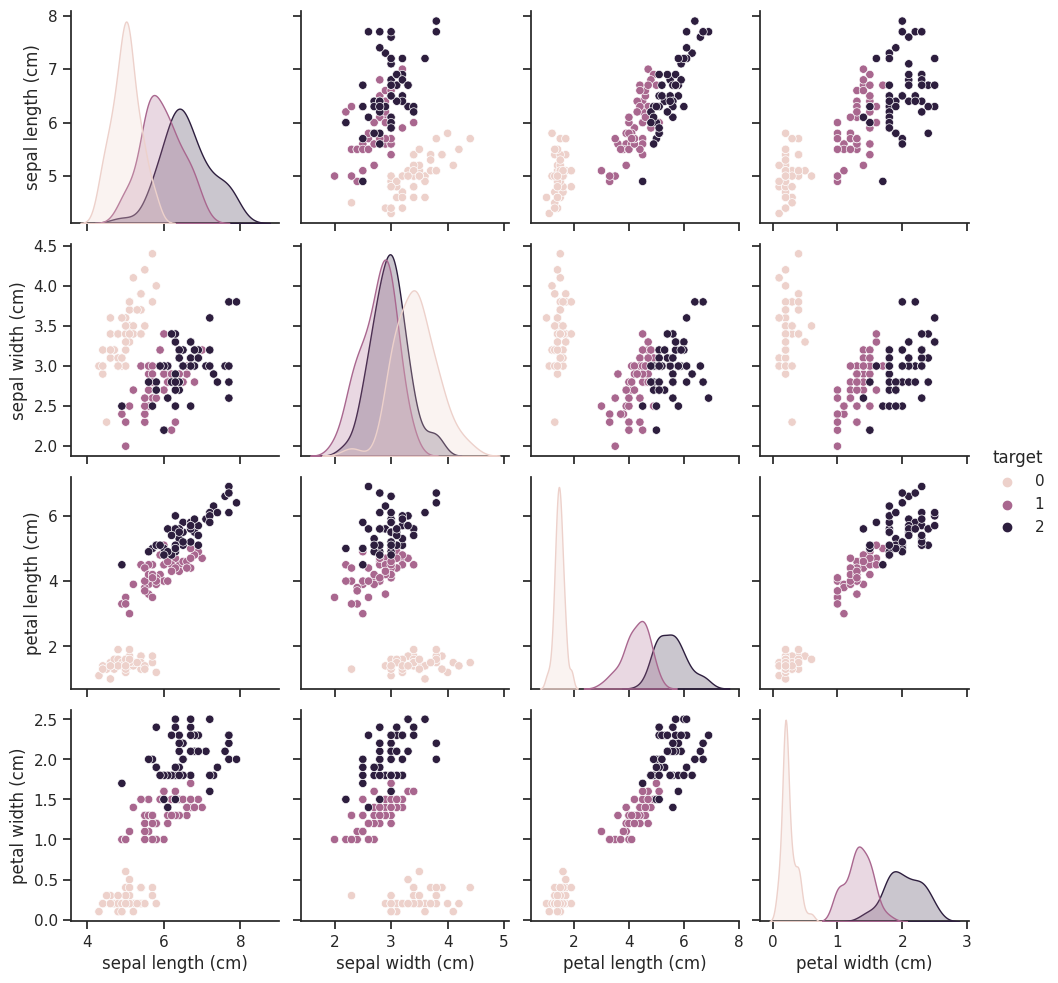

In [113]:
sns.set(style='ticks')
sns.pairplot(iris_df, hue='target')
plt.show()

### Separar o conjunto de dados em treinamento e testes

In [114]:
iris_df_X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
iris_df_Y = iris_df['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']],
    iris_df['target'],
    test_size=0.2,
    random_state=0
)

### Aplicar o KNN para treinar um modelo

Além disso, classificar os exemplos de testes

In [115]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

knn_Y_predicted = knn.predict(X_test)
knn_accuracy = np.sum(knn_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * knn_accuracy))

Acurácia: 96.67%


### Aplicar o SVM para treinar um modelo

... e classificar os exemplos de testes...

In [116]:
from sklearn import svm

svm = svm.SVC(kernel='linear', probability=True)
svm.fit(X_train, Y_train)

svm_Y_predicted = svm.predict(X_test)
svm_accuracy = np.sum(svm_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * svm_accuracy))

Acurácia: 100.00%


#### Calcular a precisão e revogação...

In [117]:
from sklearn.metrics import precision_recall_fscore_support

print("KNN (precisão, revogação, fscore)")
precision_recall_fscore_support(Y_test, knn_Y_predicted, average=None)

KNN (precisão, revogação, fscore)


(array([1.        , 1.        , 0.85714286]),
 array([1.        , 0.92307692, 1.        ]),
 array([1.        , 0.96      , 0.92307692]),
 array([11, 13,  6]))

In [118]:
print("SVM (precisão, revogação, fscore)")
precision_recall_fscore_support(Y_test, svm_Y_predicted, average=None)

SVM (precisão, revogação, fscore)


(array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([11, 13,  6]))

#### Calcular a Validação Cruzada...

In [119]:
from sklearn.model_selection import cross_val_score


scores_knn = cross_val_score(knn, iris_df_X, iris_df_Y, cv=5)
print('Acurácia KNN: {:.2f} (± {:.2f})'.format(scores_knn.mean(), scores_knn.std() * 2))

scores_svm = cross_val_score(svm, iris_df_X, iris_df_Y, cv=5)
print('Acurácia SVM: {:.2f} (± {:.2f})'.format(scores_svm.mean(), scores_svm.std() * 2))

Acurácia KNN: 0.97 (± 0.05)
Acurácia SVM: 0.98 (± 0.03)


----
# Atividades

Utilizar o conjunto de dados weatherHistory.csv, que contém o histórico de variáveis relacionadas ao clima da cidade de Szede, Hungria, entre 2006 e 2016.

Utilize técnicas de aprendizado de máquina supervisionado para criar modelos para prever o tipo de precipitação (Precip Type) de acordo com outras variáveis. Teste pelo menos três algoritmos e responda:

## 1. Leia o arquivo `weatherHistory.csv`
Armazene-os nas variável `df`. 

Chame a função `q1.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q1.hint()`

In [120]:
# q1.hint()

df = pd.read_csv("weatherHistory.csv")

q1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



## 2. Divida o conjunto de treinamento (70% das instâncias) e de teste (30% das instâncias)

Utilize uma amostragem aleatória (pesquise um parâmetro que realize isso).

Armazene os dados nas seguintes variáveis:
- `X_train` - Conjunto de atributos de entrada para treinamento
- `Y_train` - Conjunto de saída para treinamento
- `X_test` - Conjunto de atributos de entrada para teste
- `Y_test` - Conjunto de saída para teste

Chame a função `q2.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q2.hint()`

#### Trocando NaN por string nan

In [121]:
df.loc[(df['Precip Type'] != 'snow') & (df['Precip Type'] != 'rain'), 'Precip Type'] = 'nan'


In [122]:
# q2.hint()

X_train, X_test, Y_train, Y_test = train_test_split(
    df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 
        'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 
        'Loud Cover', 'Pressure (millibars)']],
    df['Precip Type'],
    test_size=0.3,
    random_state=0
)

q2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



## 3. Faça uma análise simples da distribuição dos dados de Precipitação
Analise se os dados seguem uma distribuição normal ou não, se é contínuo ou não, etc. Talvez com 1 ou 2 gráficos você consiga tirar toda a informação necessária.

Tente extrair as informações fundamentais para **escolher um modelo de aprendizado de máquina supervisionado** ideal.

Essa questão não possui verificação automática mas você pode pedir dicas com `q3.hint()`

### **Resposta 3**

Com base no gráfico abaixo, é evidente que existem diferenças nos valores das variáveis dependendo do tipo de precipitação. Além disso, visualmente podemos inferir que algoritmos de clusterização podem ser eficazes na previsão desses tipos de precipitação, apresentando resultados promissores.

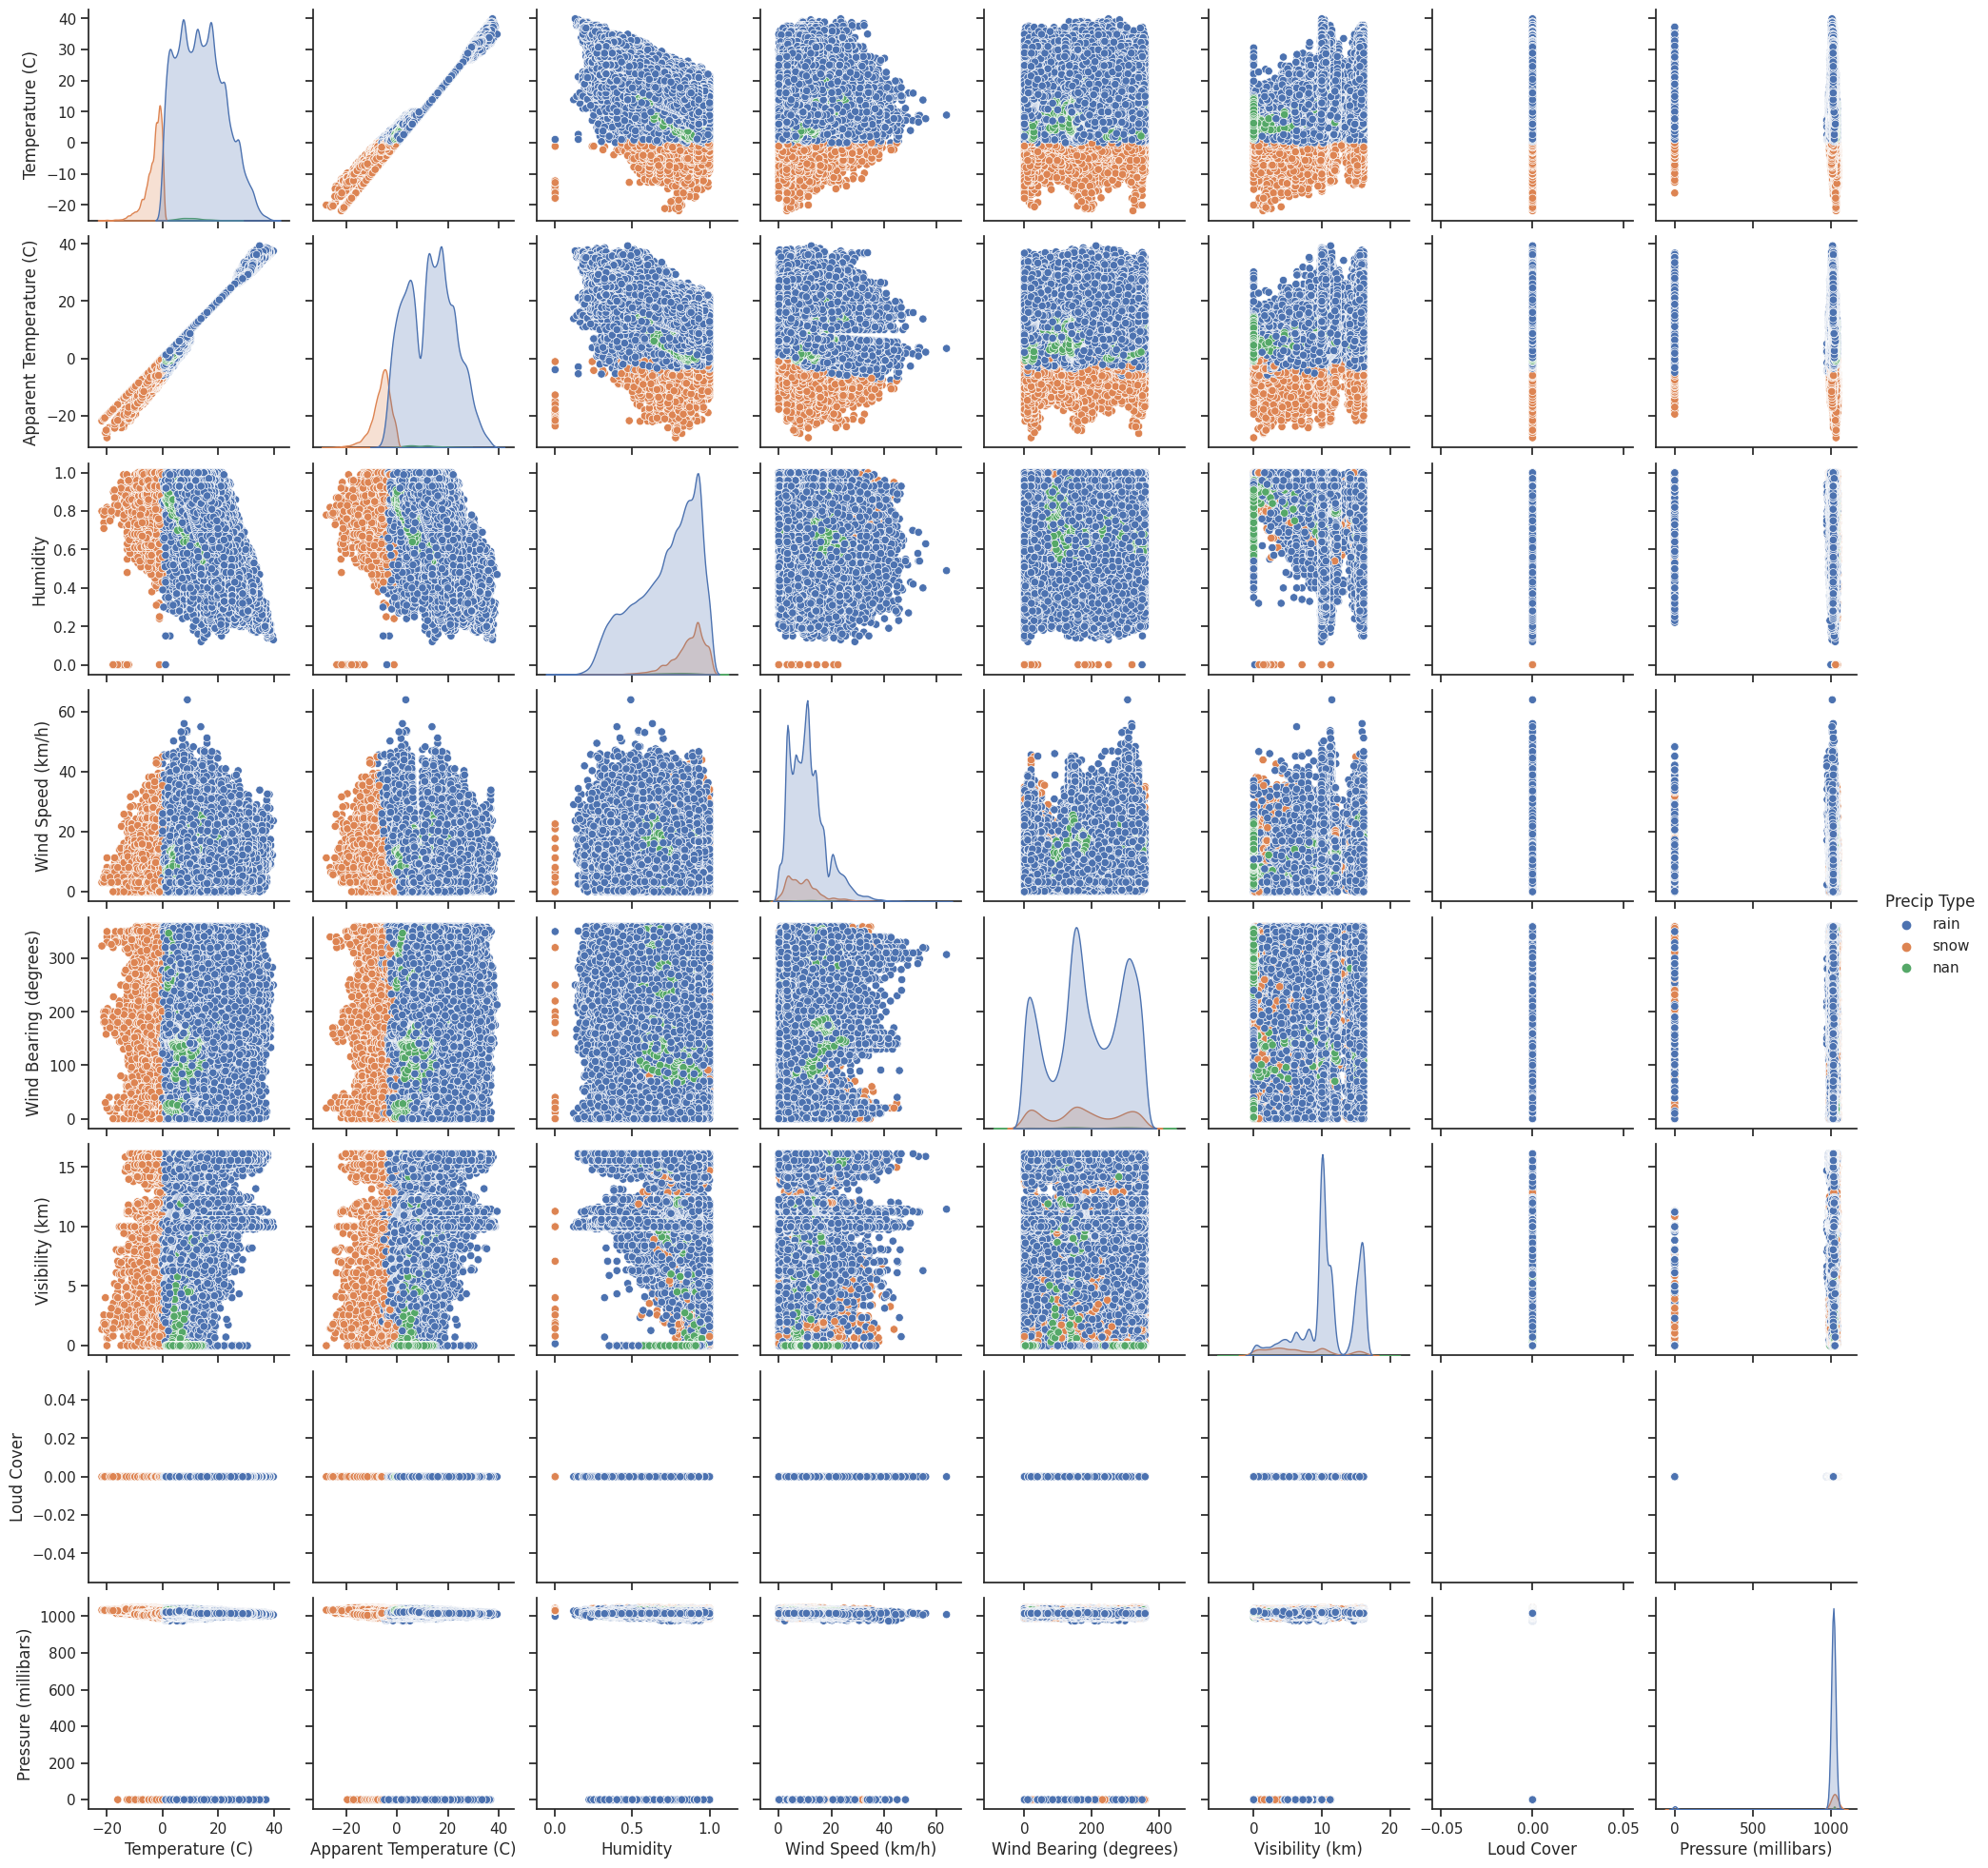

In [123]:
# Resposta da 3
sns.set(style='ticks')
sns.pairplot(df, hue='Precip Type')
plt.show()
# q3.hint()

## 4. Utilize técnicas de aprendizado de máquina **supervisionado** para prever o tipo de precipitação
Utilize técnicas de aprendizado de máquina supervisionado para criar modelos para prever o tipo de precipitação (Precip Type) de acordo com outras variáveis. 

Analise o conjunto de dadoTeste pelo menos três algoritmos. Escolha os que você julgar mais adequado e justifique porque o escolheu (uma frase curta, não precisa se aprofundar... tente aplicar os conhecimentos teóricos sobre cada modelo)


É esperado que você preencha uma célula de markdown descrevendo o método e o porquê o escolheu, e uma célula de código que faça o treinamento (`fit`) do modelo.

Essa questão não possui verificação automática mas você pode pedir dicas com `q4.hint()`

In [124]:
# q4.hint()

In [125]:
import time

### Resposta da 4: - Modelo 1

**Modelo:** **KNeighborsClassifier**

**Justificativa:** KNN é eficiênte quando temos uma separação distinta no espaço de características. Os gráficos acima mostraram bem para as variáveis de temperatura, temperatura aparente e humidade.

In [126]:
# Resposta da 4: - Modelo 1
# Faça o modelo do primeiro modelo da 4. aqui!
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

inicio = time.time()
knn.fit(X_train, Y_train)
fim = time.time()

knn_Y_predicted = knn.predict(X_test)
knn_accuracy = np.sum(knn_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * knn_accuracy))
print('Tempo: {:.4f}s'.format(fim-inicio))

Acurácia: 97.54%
Tempo: 0.3509s


### Resposta da 4: - Modelo 2

**Modelo:** **RandomForest**

**Justificativa:** Ele tem bons resultados trabalhando em dados com alta dimensionalidade. Como tinhas umas classificação envolvendo múltiplas variáveis ele foi proposto.

In [127]:
# Resposta da 4: - Modelo 2
# Faça o modelo do segundo modelo da 4. aqui!
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

inicio = time.time()
rf.fit(X_train, Y_train)
fim = time.time()

rf_Y_predicted = rf.predict(X_test)
rf_accuracy = np.sum(rf_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * rf_accuracy))
print('Tempo: {:.4f}s'.format(fim-inicio))


Acurácia: 99.60%
Tempo: 9.1315s


### Resposta da 4: - Modelo 3

**Modelo:** **DecisionTreeClassifier**

**Justificativa:** O DTC é simples e interpretável, ele normalmente é utilizado quando se pode perceber decisões simples nos dados, por exemplo, se a temperatura está baixa então está nevando.

In [128]:
# Resposta da 4: - Modelo 3
# Faça o modelo do terceiro modelo da 4. aqui!
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

inicio = time.time()
dt.fit(X_train, Y_train)
fim = time.time()

dt_Y_predicted = dt.predict(X_test)
dt_accuracy = np.sum(dt_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * dt_accuracy))
print('Tempo: {:.4f}s'.format(fim-inicio))

Acurácia: 99.37%
Tempo: 0.4638s


## 5. Calcule estatísticas para cada algoritmo escolhido
Calcule a acurácia, precisão e revocação para cada rótulo (tipo de precipitação) para cada algoritmo testado.

É esperado que você preencha a tabela markdown abaixo com os resultados.

Essa questão não possui verificação automática mas você pode pedir dicas com `q5.hint()`

In [129]:
from sklearn.metrics import accuracy_score

def calcAccuracy(y_test, y_pred):
  class_labels = set(y_test)  
  accuracies = []

  for label in class_labels:
      indices = (y_test == label)  
      y_true_class = y_test[indices]
      y_pred_class = y_pred[indices]
      acc = accuracy_score(y_true_class, y_pred_class)
      accuracies.append(acc)
  return accuracies

### Algoritmo 1

**Nome:** KNeighborsClassifier

**Resultados:**

| Label                  	| Acurácia 	| Precisão 	| Revogação 	|
|------------------------	|----------	|----------	|-----------	|
| rain 	|     97.54%    	|     98.20%     	|      99.03%     	|
| snow 	|       97.54%   	|      92.32%    	|      89.26%   	|
| nan 	|      97.54%    	|      78.72%    	|       23.27%    	|

In [130]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 1. 
from sklearn.metrics import precision_recall_fscore_support

print("nan, rain, snow")
print("Accuracy")
print(calcAccuracy(Y_test, knn_Y_predicted))
print("KNN (precisão, revogação, fscore)")
precision_recall_fscore_support(Y_test, knn_Y_predicted, average=None)

# q5.hint()

nan, rain, snow
Accuracy
[0.23270440251572327, 0.990345151076887, 0.8926111458985598]
KNN (precisão, revogação, fscore)


(array([0.78723404, 0.98197744, 0.9232513 ]),
 array([0.2327044 , 0.99034515, 0.89261115]),
 array([0.3592233 , 0.98614355, 0.90767272]),
 array([  159, 25583,  3194]))

### Algoritmo 2

**Nome:** RandomForest

**Resultados:**

| Label                  	| Acurácia 	| Precisão 	| Revogação 	|
|------------------------	|----------	|----------	|-----------	|
| rain 	|     99.60%     	|      99.56%    	|      100%    	|
| snow 	|     99.60%     	|      100%     	|      100%     	|
| nan 	|     99.60%     	|      97.82%    	|      28.30%     	|

In [131]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 2. 
print("nan, rain, snow")
print("Accuracy")
print(calcAccuracy(Y_test, rf_Y_predicted))
print("RF (precisão, revogação, fscore)")
precision_recall_fscore_support(Y_test, rf_Y_predicted, average=None)
# q5.hint()

nan, rain, snow
Accuracy
[0.2830188679245283, 0.9999609115428214, 1.0]
RF (precisão, revogação, fscore)


(array([0.97826087, 0.99556351, 1.        ]),
 array([0.28301887, 0.99996091, 1.        ]),
 array([0.43902439, 0.99775737, 1.        ]),
 array([  159, 25583,  3194]))

### Algoritmo 3

**Nome:** DecisionTreeClassifier

**Resultados:**

| Label                  	| Acurácia 	| Precisão 	| Revogação 	|
|------------------------	|----------	|----------	|-----------	|
| rain 	|     99.37%     	|     99.60%     	|      99.69%     	|
| snow 	|     99.37%     	|     100%     	|      100%     	|
| nan 	|     99.37%     	|     44.91%     	|      35.84%     	|

In [132]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 3. 
print("nan, rain, snow")
print("Accuracy")
print(calcAccuracy(Y_test, dt_Y_predicted))
print("DT (precisão, revogação, fscore)")
precision_recall_fscore_support(Y_test, dt_Y_predicted, average=None)
# q5.hint()

nan, rain, snow
Accuracy
[0.3584905660377358, 0.996912011882891, 1.0]
DT (precisão, revogação, fscore)


(array([0.41911765, 0.99601656, 1.        ]),
 array([0.35849057, 0.99691201, 1.        ]),
 array([0.38644068, 0.99646408, 1.        ]),
 array([  159, 25583,  3194]))

## 6.  É possível melhorar o algoritmo se forem selecionados alguns atributos em particular, ao invés de utilizar todos?
Descreva sua resposta para cada um dos algoritmos. Utilize evidências empíricas, se achar conveniente.

Essa questão não possui verificação automática mas você pode pedir dicas com `q6.hint()`

### **Resposta 6**

Em geral, para todos os algoritmos, as variáveis observadas apresentam distinções claras entre chuva (rain) e neve (snow), sendo mais inconsistentes na classificação dos outros dados (nan). Portanto, é provável que **não** haja uma melhora significativa ao reduzir o número de variáveis, uma vez que elas têm impacto significativo na classificação da precipitação.

Baseio a respota com observações dos gráficos feitos acima.

Abaixo uma demostração de resultados.

Obtivemos uma precisão ligeiramente menor para predizer snow e rain, mas nan obteve uma redução significativa na precisão.

In [133]:
# q6.hint()

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(
    df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']],
    df['Precip Type'],
    test_size=0.3,
    random_state=0
)

rf2 = RandomForestClassifier()

inicio = time.time()
rf2.fit(X_train2, Y_train2)
fim = time.time()

rf2_Y_predicted = rf2.predict(X_test2)
rf2_accuracy = np.sum(rf2_Y_predicted == Y_test2) / len(Y_test2)

print('Acurácia: {:.2f}%'.format(100 * rf2_accuracy))
print('Tempo: {:.4f}s'.format(fim-inicio))

# updated_models = ...

Acurácia: 99.40%
Tempo: 5.5815s


In [139]:
print("nan, rain, snow")
print("Accuracy")
print(calcAccuracy(Y_test, rf2_Y_predicted))
print("RF (precisão, revogação, fscore)")
precision_recall_fscore_support(Y_test, rf2_Y_predicted, average=None)

nan, rain, snow
Accuracy
[0.006289308176100629, 0.9994136731423211, 1.0]
RF (precisão, revogação, fscore)


(array([0.0625    , 0.99385835, 1.        ]),
 array([0.00628931, 0.99941367, 1.        ]),
 array([0.01142857, 0.99662827, 1.        ]),
 array([  159, 25583,  3194]))

**Nome:** RandomForestClassifier

**Resultados:**

| Label                  	| Acurácia 	| Precisão 	| Revogação 	|
|------------------------	|----------	|----------	|-----------	|
| rain 	|     99.40%     	|     99.39%     	|      99.94%     	|
| snow 	|     99.40%     	|     100%     	|      100%     	|
| nan 	|     99.40%     	|     6.25%     	|      0.63%     	|

## 7. Você percebeu alguma diferença no tempo de processamento dos algoritmos? Qual foi o mais lento? E qual foi o mais rápido?
Descreva sua resposta para cada um dos algoritmos. Utilize evidências empíricas, se achar conveniente.

Essa questão não possui verificação automática mas você pode pedir dicas com `q7.hint()`

### **Resposta 7**

Houveram diferenças no tempo de execução nas funções de treinanto de cada algoritmo. Foi utilizado a lib time do python para medir o tempo.

**Tempos de execução:**

| Algoritmo                  	| Tempo de execução 	|
|------------------------	|----------	|
| KNeighborsClassifier 	|     0.3509s     	| 
| RandomForest 	|     9.1315s     	|
| DecisionTreeClassifier 	|     0.4638s     	|

In [140]:
# q7.hint()

## 8. Mostre a matriz de confusão para os resultados.
Pesquise como fazer uma matriz de confusão. Descreva sua resposta para cada um dos algoritmos. Evidencie explicitamente o código utilizado, usando bibliotecas ou não.

Essa questão não possui verificação automática mas você pode pedir dicas com `q8.hint()`

### **Resposta 8**


Todos os três algoritmos apresentaram alta precisão e recall na previsão das precipitações snow e rain. 

No entanto, quando se tratou de dados nan, os algoritmos tiveram um desempenho inferior, com uma taxa de acertos relativamente baixa. Na maioria dos casos, esses dados foram classificados como rain pelos algoritmos.

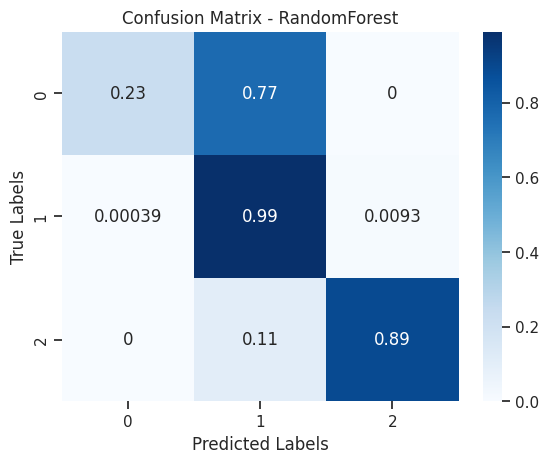

In [136]:
# q8.hint()

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, knn_Y_predicted)

row_sums = cm.sum(axis=1, keepdims=True)
normalized = cm / row_sums

sns.heatmap(normalized, annot=True, cmap='Blues')

plt.title('Confusion Matrix - RandomForest')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

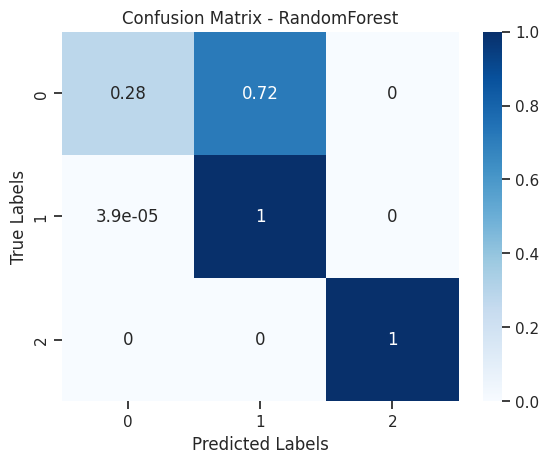

In [137]:
cm = confusion_matrix(Y_test, rf_Y_predicted)

row_sums = cm.sum(axis=1, keepdims=True)
normalized = cm / row_sums

sns.heatmap(normalized, annot=True, cmap='Blues')

plt.title('Confusion Matrix - RandomForest')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

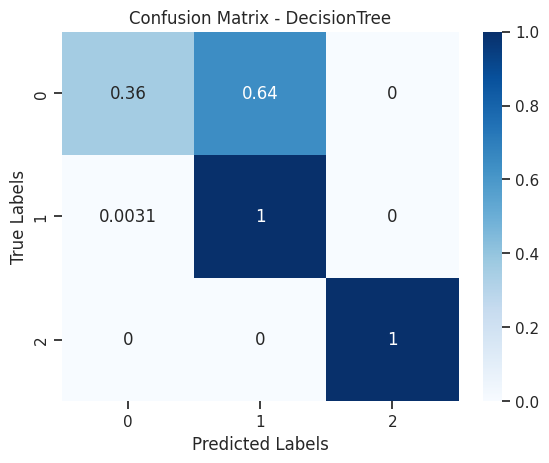

In [138]:
cm = confusion_matrix(Y_test, dt_Y_predicted)

row_sums = cm.sum(axis=1, keepdims=True)
normalized = cm / row_sums

sns.heatmap(normalized, annot=True, cmap='Blues')

plt.title('Confusion Matrix - DecisionTree')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()